## Import dependencies

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Pretrained model

In [23]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Preprocessing image and load

In [24]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = img[tf.newaxis,:]
    return img

## Visualize Image

In [47]:
content_image = load_image('2.jpg')
style_image = load_image('frida.jpg')

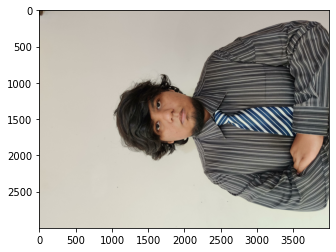

In [48]:
plt.imshow(np.squeeze(content_image))
plt.show()


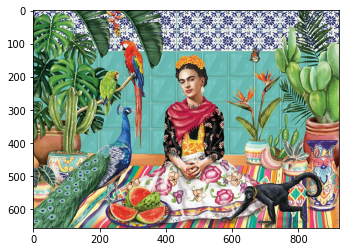

In [49]:
plt.imshow(np.squeeze(style_image))
plt.show()

## Style Image

In [50]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]

ResourceExhaustedError:  OOM when allocating tensor with shape[1,3002,4002,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node transformer/expand/conv2/MirrorPad (defined at \.conda\envs\cuda_tf\lib\site-packages\tensorflow_hub\module_v2.py:106) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_pruned_62754]

Function call stack:
pruned


In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('generated.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))